In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trip_advisor = pd.read_csv("tripadvisor_review.csv")

In [3]:
trip_advisor.describe(include="all")

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
count,980,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
unique,980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,User 551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.893194,1.352612,1.013306,0.532500,0.939735,1.842898,3.180939,2.835061,1.569439,2.799224
std,NaN,0.326912,0.478280,0.788607,0.279731,0.437430,0.539538,0.007824,0.137505,0.364629,0.321380
min,NaN,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,NaN,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,NaN,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,NaN,1.020000,1.560000,1.572500,0.580000,1.200000,2.200000,3.180000,2.910000,1.760000,3.040000


In [4]:
trip_advisor.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [5]:
trip_advisor.shape

(980, 11)

In [6]:
trip_advisor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User ID      980 non-null    object 
 1   Category 1   980 non-null    float64
 2   Category 2   980 non-null    float64
 3   Category 3   980 non-null    float64
 4   Category 4   980 non-null    float64
 5   Category 5   980 non-null    float64
 6   Category 6   980 non-null    float64
 7   Category 7   980 non-null    float64
 8   Category 8   980 non-null    float64
 9   Category 9   980 non-null    float64
 10  Category 10  980 non-null    float64
dtypes: float64(10), object(1)
memory usage: 84.3+ KB


In [8]:
import os
size= os.path.getsize(r"C:\Users\TOSHIBA\Documents\ESSENTIALS\Data Science ALL\Data Science\clustering\case 2\tripadvisor_review.csv")
size

57307

In [11]:
df=trip_advisor.drop(["User ID"], axis=1)

In [12]:
from scipy.stats import zscore
df_scaled = df.apply(zscore)

In [14]:
df_scaled.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,0.112645,0.935887,1.619750,0.312960,-0.319608,1.070169,1.158657,-0.327872,0.687518,-1.180591
1,0.388088,1.772644,2.089171,0.384494,1.098486,2.479500,3.716053,-1.492056,0.797274,-1.491908
2,1.000186,-1.156005,-0.600487,-0.008942,-1.600466,-0.561689,-0.120041,-0.255111,-0.711877,-0.931537
3,-1.356389,0.935887,-0.917663,0.134126,-1.097272,-0.598777,-0.120041,0.909073,0.001540,0.189205
4,-1.172760,-0.319248,0.211486,0.134126,1.372955,0.328415,-0.120041,-0.400634,-1.068585,-0.807010


In [15]:
from sklearn.cluster import KMeans

In [18]:
ks = range(1,15)
inertia=[]
for k in ks:
    model = KMeans(n_clusters= k)
    model.fit(df_scaled)
    inertia.append(model.inertia_)

In [31]:
labels= model.labels_
labels

array([ 5,  5, 11, 12, 10,  8,  6, 12, 13,  2, 10,  6,  4,  9,  9,  5,  7,
        4, 10,  4,  7,  6,  6,  6, 13,  5,  5, 13, 12,  4,  4,  5,  5, 13,
        2,  1, 12,  8,  4, 11,  6,  6,  7, 13,  1,  8,  1,  7, 12,  4,  6,
        7, 10, 13,  6,  8,  4, 12,  4, 10,  5, 11,  2,  1, 11, 11,  7,  7,
        7, 12, 11,  4,  2,  7,  9,  5,  8,  4,  8,  6, 11, 13,  3, 11, 11,
        6, 13,  8,  3, 12, 11, 12,  5,  4,  5, 11,  4, 13,  9,  2, 13,  8,
        5, 12,  8,  4,  9,  6, 11,  5,  2,  7, 13,  1,  4, 13,  4, 13,  7,
        7, 10, 13,  5, 11, 13, 12, 12, 13,  6, 12,  7, 10, 10, 10,  2,  1,
        9, 10,  7,  8,  6, 12,  6,  2,  1,  6, 10,  9, 13, 10,  7, 13, 12,
       12, 13,  2,  1, 11,  5,  7,  7,  2, 13, 12,  7, 12,  4, 13,  4,  1,
        1, 11, 12,  8, 13, 13,  1,  1, 13, 12,  1, 10, 13,  7,  9, 13, 10,
       11,  9,  8,  4,  4,  8,  6, 13,  8,  7,  9,  8,  3,  9, 13,  4, 13,
        7, 12, 13,  1,  7,  6,  7,  4, 12, 12,  8, 10,  6, 13, 10,  7, 10,
        7,  5,  8,  4,  6

In [28]:
centroids=model.cluster_centers_
centroids

array([[ 3.44177427,  1.58669799,  0.17483407,  0.16989249, -0.33993892,
         0.84764261,  0.16411407, -0.2955338 , -0.55029094, -0.28123024],
       [-0.39442238, -0.24317958, -0.51182123, -0.13615786, -0.02694411,
         0.08650236, -0.12004103,  1.68547161,  0.42902874,  0.12057331],
       [-0.29463552,  0.1667143 , -0.65123477, -0.27306607, -0.18061356,
        -0.46611698, -0.41512518, -0.17255442,  2.28215173,  0.58194318],
       [ 0.39420945,  1.22456817, -0.57447803,  5.69765774,  0.34826844,
         0.20046267,  0.07176366, -0.81537431, -0.15623491, -0.87550012],
       [-0.52393662, -0.16528511,  1.71173091,  0.17597286,  0.20325695,
         0.32415007,  1.61898821, -0.37662245, -0.35544281, -1.04859247],
       [ 0.12210434,  1.96433738,  1.03153128,  0.06389258,  0.77494406,
         0.91878352,  1.08890978, -0.7115238 ,  0.12127423, -0.9621029 ],
       [-0.08919252,  0.05464427, -0.78356566, -0.48839848, -0.01271133,
        -0.3997239 , -1.52822741, -0.45957977

In [29]:
cluster_df = pd.DataFrame( { "cluster_num":ks, "cluster_errors": inertia } )
cluster_df

,cluster_num,cluster_errors
0,1,9800.000000
1,2,7767.434703
2,3,7097.990818
3,4,6466.124116
4,5,5994.471886
5,6,5612.811746
6,7,5306.696321
7,8,5062.590855
8,9,4850.115518
9,10,4689.080970


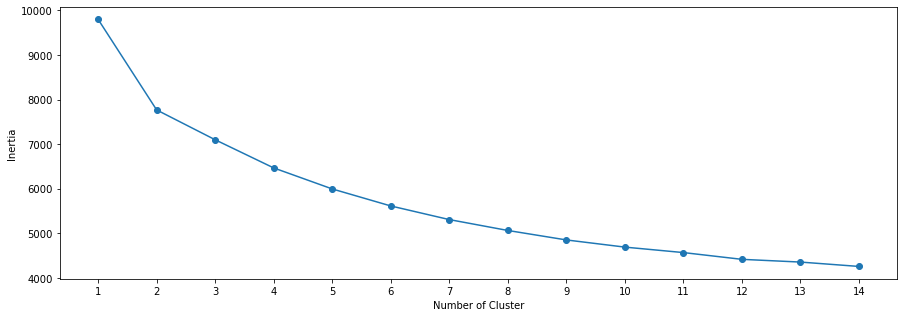

In [32]:
plt.figure(figsize=(15,5))
plt.plot(ks,inertia,marker="o")
plt.xlabel("Number of Cluster")
plt.ylabel("Inertia")
plt.xticks(ks)
plt.show()

In [33]:
# The total sum of squared distances of every data point from respective centroid is also called inertia. 
#Let us print the inertia value for all K values. 
#That K at which the inertia stop to drop significantly (elbow method) will be the best K. In our case its 2

In [117]:
model = KMeans(n_clusters=2)
model.fit(df_scaled)

KMeans(n_clusters=2)

In [118]:
centroids= model.cluster_centers_
centroid_df=pd.DataFrame(centroids,columns=list(df_scaled))
centroid_df

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,-0.029489,-0.156722,-0.533895,-0.260724,-0.392634,-0.463379,-0.513973,0.137945,0.016141,0.493649
1,0.047989,0.255041,0.868832,0.424288,0.638951,0.754078,0.836411,-0.224485,-0.026267,-0.803338


In [119]:
labels=pd.DataFrame(model.labels_, columns=["label"])
labels.head()

,label
0,1
1,1
2,0
3,0
4,1


In [109]:
# df.iloc[0:9,:].mean(axis=1)

In [120]:
df_main= pd.concat([df,labels],axis=1)

In [121]:
df_main

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,label
0,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,1
1,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32,1
2,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,0
3,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86,0
4,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,1
...,...,...,...,...,...,...,...,...,...,...,...
975,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20,0
976,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80,0
977,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02,0
978,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46,0


In [122]:
model.inertia_

7767.434703087499

**Using Hierarchical Clustering Method**

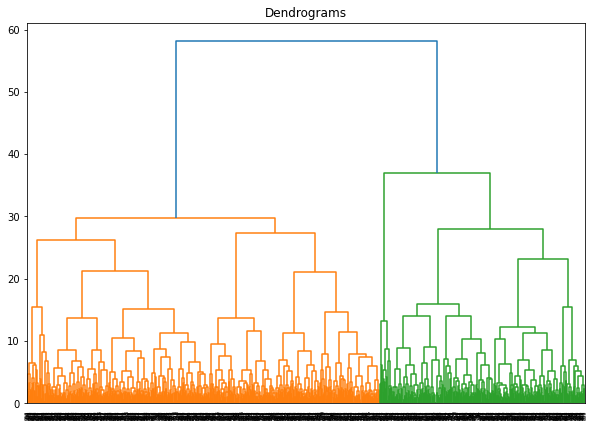

In [129]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))

**Largest vertical line is to be seen and on the basis of that we choose the threshold and then we get to know number
of clusters , so in our case it is 2**

In [130]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df_scaled)

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,

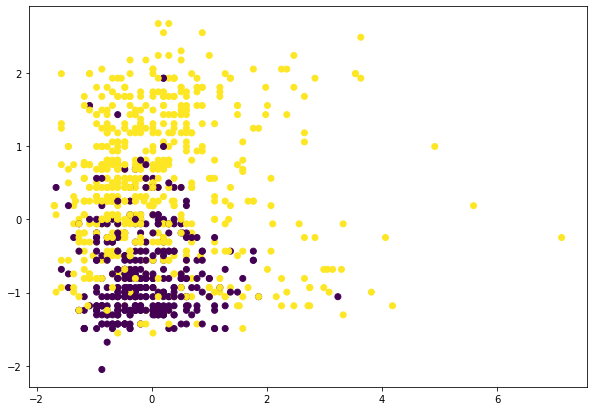

In [131]:
plt.figure(figsize=(10, 7))  
plt.scatter(df_scaled['Category 1'], df_scaled['Category 10'],c=cluster.labels_) 